In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [3]:
dataset = tf.keras.utils.get_file(
    'cats_and_dogs_filtered.zip',
    'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip',
    extract=True
)


68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 49s 1us/step


In [5]:
base_dir = os.path.join(dataset, 'cats_and_dogs_filtered')

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size= IMG_SIZE,
    batch_size= BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size= IMG_SIZE,
    batch_size= BATCH_SIZE
)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [7]:
resnet_base= tf.keras.applications.ResNet50(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)
resnet_base.trainable= False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step


In [21]:
from tensorflow.keras import layers, models

model = models.Sequential([
    resnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation= 'relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation= 'sigmoid')

])

In [23]:
model.compile(optimizer='adam',
              loss= 'binary_crossentropy',
              metrics=['accuracy'])

In [25]:
history = model.fit(
    train_ds,
    validation_data= val_ds,
    epochs=5
)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 318s 5s/step - accuracy: 0.8539 - loss: 0.3305 - val_accuracy: 0.9670 - val_loss: 0.0815
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 288s 5s/step - accuracy: 0.9667 - loss: 0.0834 - val_accuracy: 0.9780 - val_loss: 0.0525
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 281s 4s/step - accuracy: 0.9794 - loss: 0.0612 - val_accuracy: 0.9720 - val_loss: 0.0739
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 323s 4s/step - accuracy: 0.9755 - loss: 0.0586 - val_accuracy: 0.9790 - val_loss: 0.0521
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 246s 4s/step - accuracy: 0.9880 - loss: 0.0273 - val_accuracy: 0.9820 - val_loss: 0.0521


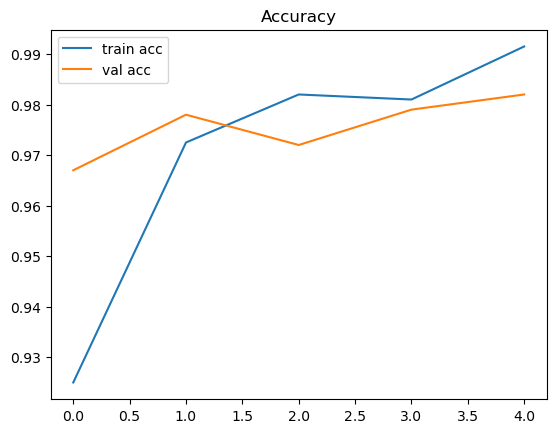

In [27]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


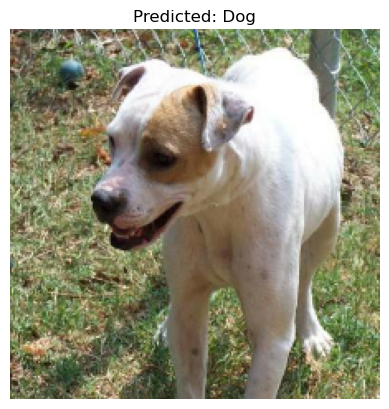

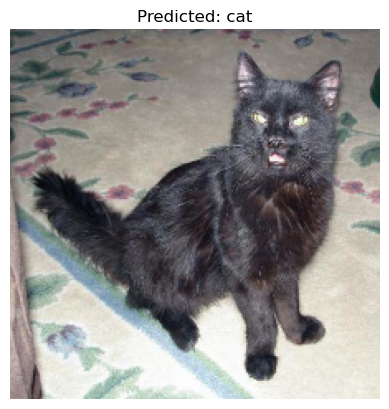

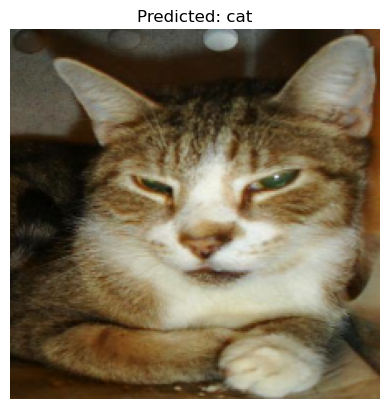

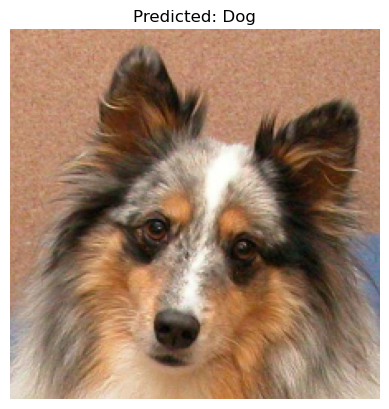

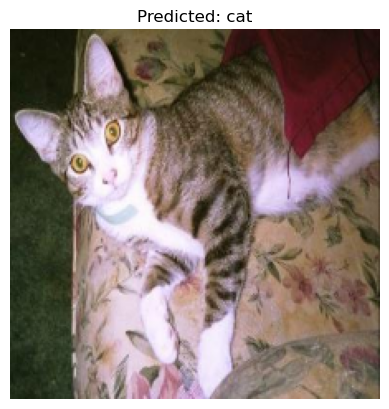

In [31]:
for image, label in val_ds.take(1):
    pred= model.predict(image)
    for i in range(5):
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title("Predicted: " + ("Dog" if pred[i]> 0.5 else "cat"))
        plt.axis('off')
        plt.show()